 **TÓPICOS AVANÇADOS EM INFORMÁTICA II**

  Prof. Helton Maia

 Aluna: [Júlia Neves Guardiani](https://gitlab.com/juguardiani), 20200000705

*Curso de Deep Learning para Visão Computacional*

 Escola de Ciências e Tecnologia  - DCA

UFRN - 2021.1


Exercício 03 - Convolução de imagens  

In [ ]:
#Importações para o exercício 
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

#1.0
Utilizando a sequência de kernels que foram apresentados, escreva um programa
em python (utilize bibliotecas como numpy e opencv) que mostre os resultados de cada um dos filtros no processo de convolução de imagens. Escreva um comentário
explicando o que ocorreu, se houveram efeitos e suas impressões.


É notável o funcionamento dos filtros que enaltecem as bordas, linhas horizontais, linhas verticais e as diagonais. O filtro gaussiano precisariam de compressão para termos um resultado mais claro. O filtro de bordas também percebe-se bem que enaltece as bordas.



In [ ]:
#Direcionamento de raciocínio: Utilizando bibliotecas numpy e opencv e a sequência de kernels.
img = cv.imread('princesaJujuba.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(np.shape(gray))

(540, 1210)


In [ ]:
#Utilizando a sequência de kernels que foram apresentados:
kb = (np.array([[1,1,1],[1,1,1],[1,1,1]]))/9 #blur
kgb = (np.array([[0,0,0,5,0,0,0],[0,5,18,32,18,5,0],[0,18,64,100,64,18,0],[5,32,100,100,100,32,5],[0,18,64,100,64,18,0],[0,5,18,32,18,5,0],[0,0,0,5,0,0,0]])) #Gaussian Blur
khl = (np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])) # linhas horizontais.
kvl = (np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])) # linhas verticais.
k45d = (np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]])) #45.
k135d = (np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])) #135.
ke = (np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])) #Edge.
kl = (np.array([[0,0,1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,1,0,0]])) #laplaciano


In [ ]:
#Convolução 2D
gaussian_b = cv.filter2D(gray,kernel=kgb,ddepth=-1)
horizontal_l = cv.filter2D(gray,kernel=khl,ddepth=-1)
vertical_l = cv.filter2D(gray,kernel=kvl,ddepth=-1)
degree45_l = cv.filter2D(gray,kernel=k45d,ddepth=-1)
degree135_l = cv.filter2D(gray,kernel=k135d,ddepth=-1)
edge = cv.filter2D(gray,kernel=ke,ddepth=-1)
laplaciano = cv.filter2D(gray,kernel=kl,ddepth=-1)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc12fed1dd0>,
 Text(0.5, 1.0, 'Lapalaciano'))

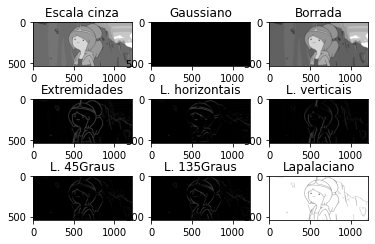

In [ ]:
gray_b = cv.filter2D(gray,kernel=kb,ddepth=-1)
for i in range(10):
  gray_b = cv.filter2D(gray_b,kernel=kb,ddepth=-1)

plt.subplot(3, 3, 1), plt.imshow(gray,cmap='gray'),plt.title('Escala cinza')
plt.subplot(3, 3, 2), plt.imshow(gaussian_b,cmap='gray'),plt.title('Gaussiano')
plt.subplot(3, 3, 3), plt.imshow(gray_b,cmap='gray'),plt.title('Borrada')
plt.subplot(3, 3, 4), plt.imshow(edge,cmap='gray'),plt.title('Extremidades')
plt.subplot(3, 3, 5), plt.imshow(horizontal_l,cmap='gray'),plt.title('L. horizontais')
plt.subplot(3, 3, 6), plt.imshow(vertical_l,cmap='gray'),plt.title('L. verticais')
plt.subplot(3, 3, 7), plt.imshow(degree45_l,cmap='gray'),plt.title('L. 45Graus')
plt.subplot(3, 3, 8), plt.imshow(degree135_l,cmap='gray'),plt.title('L. 135Graus')
plt.subplot(3, 3, 9), plt.imshow(laplaciano,cmap='gray'),plt.title('Lapalaciano')

#2.0
Pesquise por pelo menos três novos kernels, realize novas convoluções e mostre os resultados obtidos

#3.0
Insira algum tipo de ruído nas imagens (pesquise algumas opções, por exemplo:
salt and pepper noise) e em diferentes níveis. Depois disto, procure algum kernel apropriado para filtragem e remoção deste ruído. Apresente os resultados, explicando o tipo de ruído inserido e os efeitos do kernel selecionado para remoção